In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
from matplotlib import cm

In [4]:
ccdr =  pd.read_csv('credit_card_default.csv')

In [5]:
ccdr.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [18]:
# Percentage of cardholders by education
ccdr['EDUCATION'].value_counts()/30000

2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: EDUCATION, dtype: float64

In [19]:
# Percentage of cardholders by gender
ccdr['SEX'].value_counts()/30000

2    0.603733
1    0.396267
Name: SEX, dtype: float64

In [25]:
# Add default column for visualization 
ccdr['default']=ccdr['default.payment.next.month']

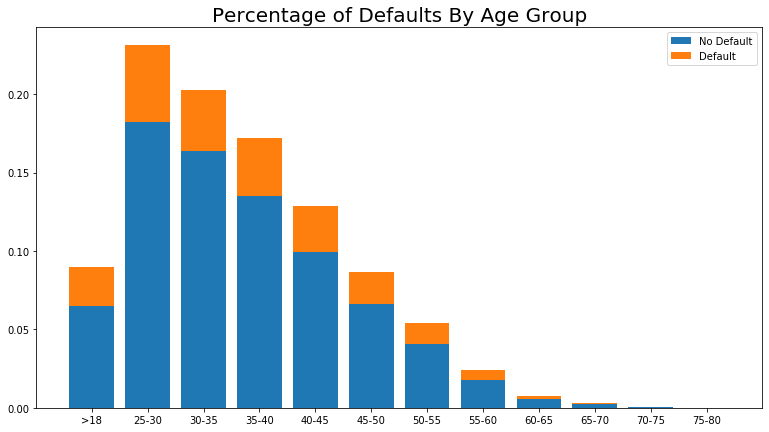

In [38]:
#Percentage of defaults by age group
age_groups = ccdr.AGE // 5 + 1
age_groups.fillna(0, inplace=True)

num_people = ccdr.shape[0]
no_default_age_group = age_groups[ccdr.default==0].value_counts()
default_age_group = age_groups[ccdr.default==1].value_counts()
width = 0.8


inds = np.sort(no_default_age_group.index.values)

plt.figure(figsize=(13, 7))

age_groups_no_default_bar = plt.bar(inds, no_default_age_group[inds].values / num_people, width)
age_groups_default_bar = plt.bar(inds, default_age_group[inds].values / num_people, width,
                                  bottom=no_default_age_group[inds].values / num_people)

plt.title('Percentage of Defaults By Age Group', fontdict={'fontsize':20})

age_groups_ticks = ['>18'] + ['{}-{}'.format(int(i * 5), int((i + 1)* 5)) for i in inds[0:]]

plt.xticks(inds, age_groups_ticks)
plt.legend((age_groups_no_default_bar[0], age_groups_default_bar[0]), ('No Default', 'Default'))

plt.savefig('Percentage of Default By Age')
plt.show()

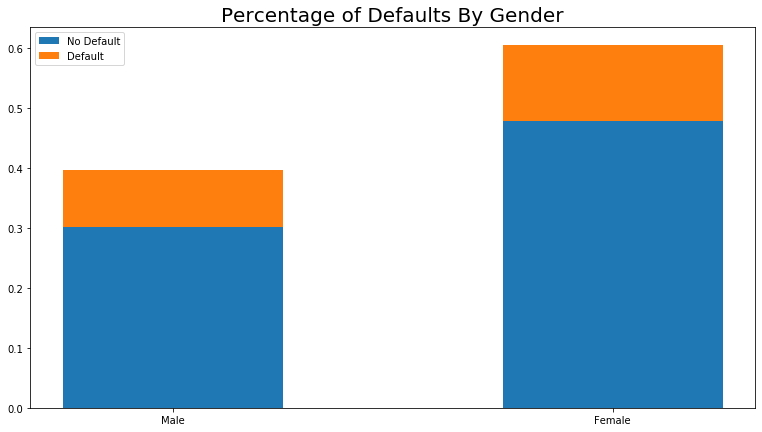

In [75]:
# Percentage of defaults by gender
gender = ccdr.SEX

num_people = ccdr.shape[0]
no_default_gender = gender[ccdr.default==0].value_counts()
default_gender = gender[ccdr.default==1].value_counts()
width = 0.5


inds = np.sort(no_default_gender.index.values)
plt.figure(figsize=(13, 7))

gender_no_default_bar = plt.bar(inds, no_default_gender[inds].values / num_people, width)
gender_default_bar = plt.bar(inds, default_gender[inds].values / num_people, width,
                                  bottom=no_default_gender[inds].values / num_people)

plt.title('Percentage of Defaults By Gender', fontdict={'fontsize':20})

gender_ticks = ['Male'] + ['Female']

plt.xticks(inds, gender_ticks)
plt.legend((gender_no_default_bar[0], gender_default_bar[0]), ('No Default', 'Default'))

plt.savefig('Percentage of Default By Gender')
plt.show()

In [66]:
# Replace education less than 1 and greater that 4 as 4 ('other')
ccdr['EDUCATION'].replace([0,5,6],4, inplace=True)

In [67]:
# Sanity check
ccdr['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

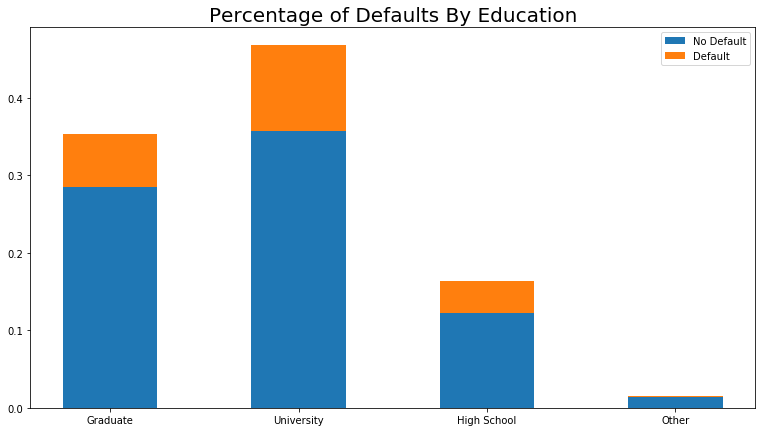

In [70]:
#Percentage of defaults by education
education = ccdr.EDUCATION

num_people = ccdr.shape[0]
no_default_education = education[ccdr.default==0].value_counts()
default_education = education[ccdr.default==1].value_counts()
width = 0.5


inds = np.sort(no_default_education.index.values)
plt.figure(figsize=(13, 7))

education_no_default_bar = plt.bar(inds, no_default_education[inds].values / num_people, width)
education_default_bar = plt.bar(inds, default_education[inds].values / num_people, width,
                                  bottom=no_default_education[inds].values / num_people)

plt.title('Percentage of Defaults By Education', fontdict={'fontsize':20})

education_ticks = ['Graduate'] + ['University'] + ['High School'] +['Other']

plt.xticks(inds, education_ticks)
plt.legend((education_no_default_bar[0], education_default_bar[0]), ('No Default', 'Default'))

plt.savefig('Percentage of Default By Education')
plt.show()